## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [4]:
df = pd.read_csv('C:\\Users\\Faheem\\Downloads\\Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


## Data Exploration

In [6]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [7]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [8]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [9]:
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [10]:
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [11]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [12]:
df.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [13]:
df.value_counts()

Company                    Age   Salary  Place     Country  Gender
Infosys                    22.0  8787.0  Calcutta  India    1         2
TCS                        21.0  4824.0  Mumbai    India    0         2
CTS                        0.0   1234.0  Calcutta  India    0         1
TCS                        0.0   9024.0  Chennai   India    1         1
                           23.0  4824.0  Calcutta  India    0         1
                                                                     ..
Infosys                    22.0  8202.0  Cochin    India    0         1
                           21.0  3030.0  Calcutta  India    0         1
                           0.0   3234.0  Mumbai    India    0         1
                                 3030.0  Calcutta  India    0         1
Tata Consultancy Services  31.0  8345.0  Mumbai    India    0         1
Name: count, Length: 91, dtype: int64

In [14]:
print("\nUnique values in each feature and their lengths:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values} (length: {len(unique_values)})")


Unique values in each feature and their lengths:
Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] (length: 7)
Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] (length: 30)
Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] (length: 41)
Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] (length: 12)
Country: ['India'] (length: 1)
Gender: [0 1] (length: 2)


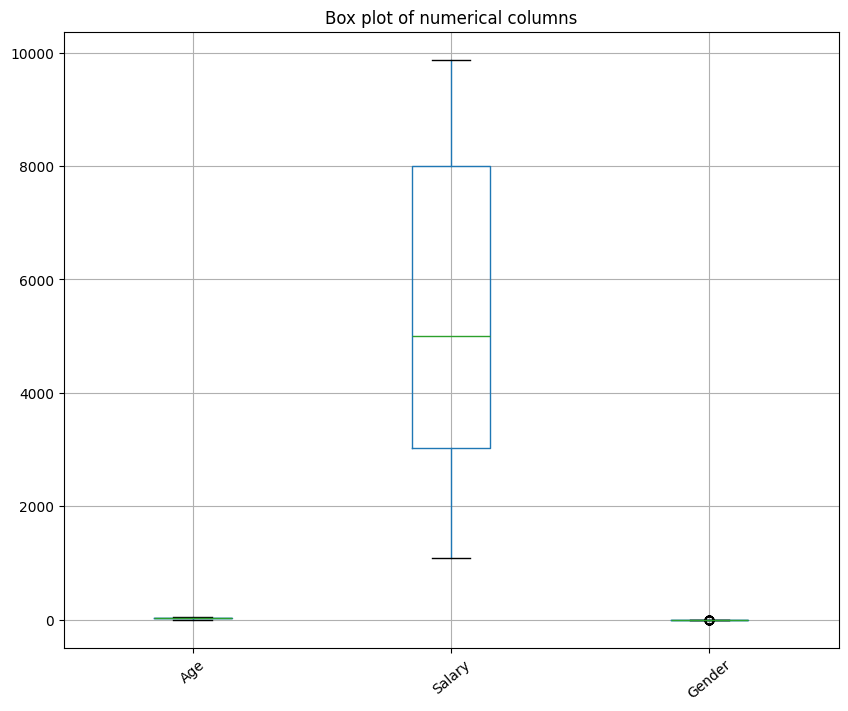

In [15]:
plt.figure(figsize=(10, 8))
df.boxplot()
plt.title('Box plot of numerical columns')
plt.xticks(rotation=40)
plt.show()

it shows that there are no significant outliers present in either of the numerical columns.

## Data Cleaning

We have null values in columns 'Company' , 'Age' , 'Salary' and 'City'.

In [16]:
df['Age'].isnull().value_counts()

Age
False    130
True      18
Name: count, dtype: int64

We need to replace 0 in age as NaN

In [17]:
value_counts=(df['Age']==0).value_counts()
value_counts

Age
False    142
True       6
Name: count, dtype: int64

In [18]:
#replacing 0 with nan
df['Age'] = df['Age'].replace(0, np.nan)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [19]:
mean_age=math.ceil(df['Age'].mean())
mean_age

32

In [20]:
# Replace NaN in the "Age" column with mean value
df['Age'] = df['Age'].replace(np.NaN, mean_age)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [21]:
mode = df['Company'].mode()[0]
mode

'TCS'

In [22]:
# Replace NaN in the "Company" column with mode
df['Company'] = df['Company'].replace(np.NaN, mode)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [23]:
df['Salary'].isnull().value_counts()

Salary
False    124
True      24
Name: count, dtype: int64

In [24]:
#finding mean to fill the missing values
mean_salary = df['Salary'].mean()
mean_salary

5312.467741935484

In [25]:
# Replace NaN in the "Salary" column with mean value
df['Salary'] = df['Salary'].replace(np.NaN, mean_salary)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [28]:
Mode = df['Place'].mode()[0]
Mode


'Mumbai'

In [29]:
# Replace NaN in the "Place" column with mode
df['Place'] = df['Place'].replace(np.NaN, Mode)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


## Data Analysis

In [30]:
#Filtered the data with age>40 and salary<5000
filtered_data = df[(df['Age'] > 40) & (df['Salary']<5000)]
filtered_data

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


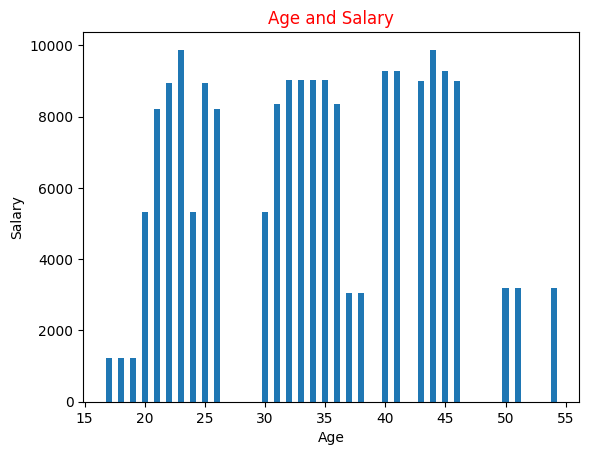

In [31]:
#chart with age and salary
plt.bar(df['Age'],df['Salary'],width=0.5)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age and Salary',color='r')
plt.show()

In [32]:
#number of people from each place
place_count=df['Place'].value_counts()
place_count

Place
Mumbai        51
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

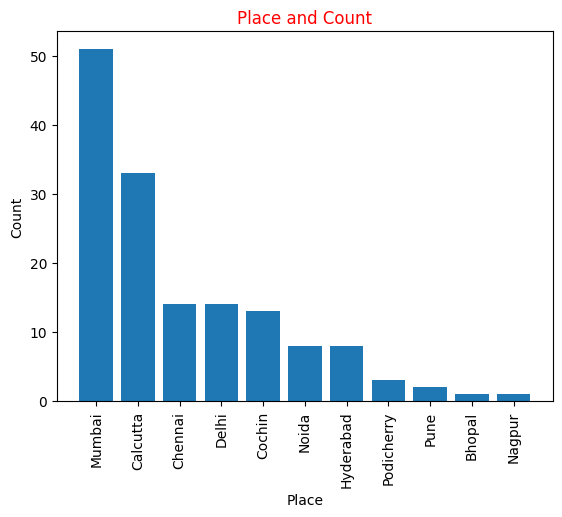

In [33]:
plt.bar(place_count.index, place_count)
plt.xlabel('Place')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Place and Count',color='r')
plt.show()

## Data Encoding

#LABEL ENCODING

In [35]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/57/ed/f607ebf69f87bcce2e3fa329bd78da8cafd3d51190a19d58012d2d7f2252/scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 3.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.9 MB 8.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.9 MB 9.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.9 MB 8.9


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
pip show scikit=learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 330.3 kB/s eta 0:00:07
    --------------------------------------- 0.0/2.1 MB 245.8 kB/s eta 0:00:09
   - -------------------------------------- 0.1/2.1 MB 416.7 kB/s eta 0:00:05
   ---- ----------------------------------- 0.2/2.1 MB 875.2 kB/s eta 0:00:03
   ---------- ----------------------------- 0.5/2.1 MB 2.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.1 MB 2.6 MB/s eta 0:00:01
   ---------------------- ----------------- 1.2/2.1 MB 3.1 MB/s eta 0:

In [38]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ["Company", "Place", "Country"]

label_encoder = LabelEncoder()

# Initialize a new DataFrame to store the encoded columns
df_label_encoded = df.copy()

for col in cols_to_encode:
    df_label_encoded [col]= label_encoder.fit_transform(df[col])

df_label_encoded

,Company,Age,Salary,Place,Country,Gender
0,4,20.0,5312.467742,2,0,0
1,2,30.0,5312.467742,6,0,0
2,4,35.0,2300.000000,1,0,0
3,2,40.0,3000.000000,4,0,0
4,4,23.0,4000.000000,6,0,0
...,...,...,...,...,...,...
143,4,33.0,9024.000000,1,0,1
144,2,22.0,8787.000000,1,0,1
145,2,44.0,4034.000000,4,0,1
146,4,33.0,5034.000000,6,0,1


#ONE HOT ENCODING

In [42]:
#using get_dummies function

df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Company", "Place","Country"])

print(df_one_hot_encoded )

      Age       Salary  Gender  Company_CTS  Company_Congnizant  \
0    20.0  5312.467742       0        False               False   
1    30.0  5312.467742       0        False               False   
2    35.0  2300.000000       0        False               False   
3    40.0  3000.000000       0        False               False   
4    23.0  4000.000000       0        False               False   
..    ...          ...     ...          ...                 ...   
143  33.0  9024.000000       1        False               False   
144  22.0  8787.000000       1        False               False   
145  44.0  4034.000000       1        False               False   
146  33.0  5034.000000       1        False               False   
147  22.0  8202.000000       0        False               False   

     Company_Infosys  Company_Infosys Pvt Lmt  Company_TCS  \
0              False                    False         True   
1               True                    False        False   
2        

In [43]:
#using OneHotEncoder Function

from sklearn.preprocessing import OneHotEncoder


cols_to_encode = ["Company", "Place","Country"]
new_encoded_cols = []


# Create a list of new columns names
for col in cols_to_encode:
    new_encoded_cols += [f"is_{category}" for category in df[col].unique().tolist()]

print(new_encoded_cols)
#['is_TCS', 'is_Infosys', 'is_CTS', 'is_Congnizant', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_India']


# Inititalize and fit One Hot Encoder class from sklearn
one_hot_encoder = OneHotEncoder(sparse_output = False,handle_unknown = 'ignore')
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])
print(encoded_cols)

# As the output of the above transformer would be a sparse matrix, we need to convert it back to Pandas dataframe
df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols)
print(df_encoded)
df_one_hot_encoded = df.join(df_encoded)

print(df_one_hot_encoded)

['is_TCS', 'is_Infosys', 'is_CTS', 'is_Tata Consultancy Services', 'is_Congnizant', 'is_Infosys Pvt Lmt', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_India']
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]
     is_TCS  is_Infosys  is_CTS  is_Tata Consultancy Services  is_Congnizant  \
0       0.0         0.0     0.0                           0.0            1.0   
1       0.0         0.0     1.0                           0.0            0.0   
2       0.0         0.0     0.0                           0.0            1.0   
3       0.0         0.0     1.0                           0.0            0.0   
4       0.0         0.0     0.0                           0.0            1.0   
..      ...         ...     ...                           ...            ...   
143     0.0      

## FEATURE SCALING

MIN MAX SCALER

In [40]:
from sklearn.preprocessing import MinMaxScaler

Columns_to_Scale=df[['Age','Salary']]

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(Columns_to_Scale)

# Transform the data
scaled_data = scaler.transform(Columns_to_Scale)

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Salary'])

# Initialize a new DataFrame to store after applying standard scaler
df_minmax = df.copy()

# Replace scaled columns in the original DataFrame
df_minmax[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_minmax)

     Company       Age    Salary     Place Country  Gender
0        TCS  0.081081  0.480650   Chennai   India       0
1    Infosys  0.351351  0.480650    Mumbai   India       0
2        TCS  0.486486  0.137817  Calcutta   India       0
3    Infosys  0.621622  0.217480     Delhi   India       0
4        TCS  0.162162  0.331285    Mumbai   India       0
..       ...       ...       ...       ...     ...     ...
143      TCS  0.432432  0.903039  Calcutta   India       1
144  Infosys  0.135135  0.876067  Calcutta   India       1
145  Infosys  0.729730  0.335154     Delhi   India       1
146      TCS  0.432432  0.448959    Mumbai   India       1
147  Infosys  0.135135  0.809491    Cochin   India       0

[148 rows x 6 columns]


In [41]:
#dataframe after label encoding & minmax scaling

# Initialize a new DataFrame to store after applying standard scaler
df_minmax = df_label_encoded.copy()

# Replace scaled columns in the original DataFrame
df_minmax[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_minmax)

     Company       Age    Salary  Place  Country  Gender
0          4  0.081081  0.480650      2        0       0
1          2  0.351351  0.480650      6        0       0
2          4  0.486486  0.137817      1        0       0
3          2  0.621622  0.217480      4        0       0
4          4  0.162162  0.331285      6        0       0
..       ...       ...       ...    ...      ...     ...
143        4  0.432432  0.903039      1        0       1
144        2  0.135135  0.876067      1        0       1
145        2  0.729730  0.335154      4        0       1
146        4  0.432432  0.448959      6        0       1
147        2  0.135135  0.809491      3        0       0

[148 rows x 6 columns]


#STANDARD SCALER

In [44]:
from sklearn.preprocessing import StandardScaler

Columns_to_Scale=df[['Age','Salary']]
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(Columns_to_Scale)

# Transform the data
scaled_data = scaler.transform(Columns_to_Scale)

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Salary'])

# Initialize a new DataFrame to store after applying standard scaler
df_standard = df.copy()

# Replace scaled columns in the original DataFrame
df_standard[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_standard)

     Company       Age    Salary     Place Country  Gender
0        TCS -1.452935  0.000000   Chennai   India       0
1    Infosys -0.238737  0.000000    Mumbai   India       0
2        TCS  0.368361 -1.283902  Calcutta   India       0
3    Infosys  0.975460 -0.985565     Delhi   India       0
4        TCS -1.088676 -0.559369    Mumbai   India       0
..       ...       ...       ...       ...     ...     ...
143      TCS  0.125522  1.581841  Calcutta   India       1
144  Infosys -1.210095  1.480832  Calcutta   India       1
145  Infosys  1.461139 -0.544878     Delhi   India       1
146      TCS  0.125522 -0.118682    Mumbai   India       1
147  Infosys -1.210095  1.231507    Cochin   India       0

[148 rows x 6 columns]


In [45]:
#dataframe after OneHotEncoding & standard scaling

# Initialize a new DataFrame to store after applying standard scaler
df_standard = df_one_hot_encoded.copy()

# Replace scaled columns in the original DataFrame
df_standard[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_standard)

     Company       Age    Salary     Place Country  Gender  is_TCS  \
0        TCS -1.452935  0.000000   Chennai   India       0     0.0   
1    Infosys -0.238737  0.000000    Mumbai   India       0     0.0   
2        TCS  0.368361 -1.283902  Calcutta   India       0     0.0   
3    Infosys  0.975460 -0.985565     Delhi   India       0     0.0   
4        TCS -1.088676 -0.559369    Mumbai   India       0     0.0   
..       ...       ...       ...       ...     ...     ...     ...   
143      TCS  0.125522  1.581841  Calcutta   India       1     0.0   
144  Infosys -1.210095  1.480832  Calcutta   India       1     0.0   
145  Infosys  1.461139 -0.544878     Delhi   India       1     0.0   
146      TCS  0.125522 -0.118682    Mumbai   India       1     0.0   
147  Infosys -1.210095  1.231507    Cochin   India       0     0.0   

     is_Infosys  is_CTS  is_Tata Consultancy Services  ...  is_Calcutta  \
0           0.0     0.0                           0.0  ...          1.0   
1        